In [1]:
#By: Kevin Wang Ji
#Building a simple Convolutional Neural Network to classify dogs and cats
#August 9, 2020

#This Jupyter Notebook is meant for presentation purposes. Code is modified from Original Code. Original Code available in Repo

import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

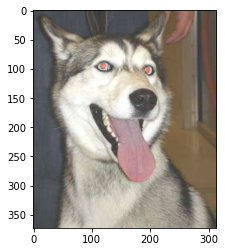

In [28]:
#Set up Image Dimension and DataFrame


#print(os.listdir('data/train'))

IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

filenames = os.listdir("train")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})
df = df.reset_index(drop=True)

#Check DataFrame attributes
df.category.value_counts()
df.head()

#Look at a random Image
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)
plt.show()


In [3]:

#Convolutional Neural Network Model Building
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Sigmoid because its a binary classification model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [4]:
#CallBack Function
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]
batch_size = 16

In [ ]:
#Image Generators to feed into Model 

#Initialize ImageDataGenerator and transformations
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)
#Generator for Training/ Validation Data
train_generator = train_datagen.flow_from_dataframe(
    df,
    "train",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size,
    subset='training'
)


validation_generator = train_datagen.flow_from_dataframe(
    df,
    "train",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size,
    subset='validation'
)

In [ ]:
#Fitting the Model - Model Ran seperately on VSCode

#Running for 50 Epochs
epochs = 50

#Model with Validation Split
loss = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=(df.shape[0]*.2)//batch_size,
    steps_per_epoch=(df.shape[0]*.8)//batch_size,
    callbacks=callbacks
)

In [ ]:
#Save model and weights
model.save_weights("model.h5")
model.save('my_model')

In [8]:
#loss.history taken from previous run with 50 Epochs
history = {'loss': [0.6925471425056458, 0.56419438123703, 0.5152462124824524, 0.475467324256897, 0.4531380832195282, 
                         0.4330286681652069, 0.42105722427368164, 0.40182259678840637, 0.3904205858707428, 0.3821852505207062, 
                         0.3697826862335205, 0.374711811542511, 0.35199499130249023, 0.3488067090511322, 0.3585265874862671,
                         0.34335631132125854, 0.33341798186302185, 0.3350245952606201, 0.3229055404663086, 0.31825506687164307, 
                         0.3197551369667053, 0.31910961866378784, 0.3046073615550995, 0.3009584844112396, 0.31105634570121765, 
                         0.32119590044021606, 0.2963438630104065, 0.28986722230911255, 0.2935967743396759, 0.30050936341285706],
                'accuracy': [0.6396499872207642, 0.700950026512146, 0.7423999905586243, 0.7681999802589417, 0.7845500111579895, 
                             0.7967000007629395, 0.8044000267982483, 0.817799985408783, 0.824150025844574, 0.827049970626831, 
                             0.8355500102043152, 0.8317000269889832, 0.8418999910354614, 0.8446499705314636, 0.8402000069618225,
                             0.8502500057220459, 0.8549000024795532, 0.853600025177002, 0.8596000075340271, 0.8617500066757202, 
                             0.8624500036239624, 0.8605999946594238, 0.8694000244140625, 0.8704500198364258, 0.8674499988555908,
                             0.8603500127792358, 0.8736500144004822, 0.8757500052452087, 0.8745499849319458, 0.8726500272750854],
                'val_loss': [0.9002458453178406, 0.4103057086467743, 0.30086028575897217, 1.1430468559265137, 0.7558616399765015,
                             0.14424405992031097, 0.39566826820373535, 0.27908775210380554, 0.26124659180641174, 0.32307782769203186, 
                             0.24047428369522095, 0.1961592584848404, 0.2576531767845154, 0.16941548883914948, 0.23417147994041443, 
                             0.12637895345687866, 0.1326567679643631, 0.3692111372947693, 0.27556151151657104, 0.0841737687587738, 
                             0.11059467494487762, 0.11665581166744232, 0.30517756938934326, 0.2346193790435791, 0.16901490092277527, 
                             0.252206414937973, 0.09972740709781647, 0.1087505891919136, 0.3773396611213684, 0.1516771763563156], 
                'val_accuracy': [0.3279246687889099, 0.8415464758872986, 0.9316906929016113, 0.3796073794364929, 0.6364182829856873, 
                                 0.9825721383094788, 0.8149038553237915, 0.8888221383094788, 0.8844150900840759, 0.8651843070983887, 
                                 0.8966346383094788, 0.9340945482254028, 0.9046474099159241, 0.9360977411270142, 0.9044471383094788, 
                                 0.9725561141967773, 0.9569311141967773, 0.8473557829856873, 0.8888221383094788, 0.9765625, 
                                 0.9705528616905212, 0.9577323794364929, 0.864182710647583, 0.9100561141967773, 0.9330929517745972, 
                                 0.8956330418586731, 0.9711538553237915, 0.9677484035491943, 0.8413461446762085, 0.9443109035491943]}



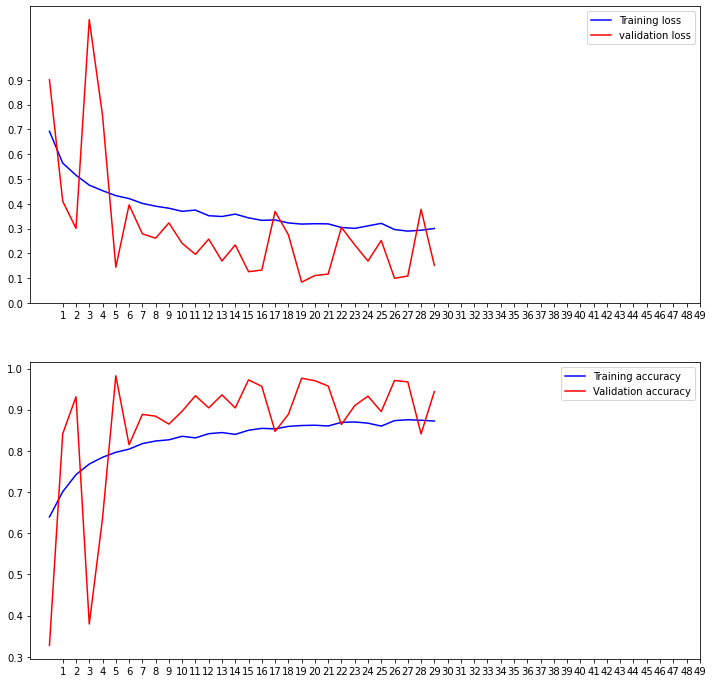

In [9]:
#Plot Loss / Accuracy of Train and Validation set 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history['loss'], color='b', label="Training loss")
ax1.plot(history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history['val_accuracy'], color='r', label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

In [19]:
print('Highest Validation Accuracy ', max(history['val_accuracy'])) 
print('Last Epoch Validation Accuracy ', history['val_accuracy'][-1])
print('__________________________________________________________')
print('Highest Training Accuracy ', max(history['accuracy']))
print('Last Epoch Training Accuracy ', history['accuracy'][-1])

Highest Validation Accuracy  0.9825721383094788
Last Epoch Validation Accuracy  0.9443109035491943
__________________________________________________________
Highest Training Accuracy  0.8757500052452087
Last Epoch Training Accuracy  0.8726500272750854
